<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/notebooks/es1/MetodiAI_Fis2022_Es1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 1: python e uso librerie numpy, matplotlib

**Task:**

1.   implementazione di semplici algoritmi che operano su vettori e matrici senza e con l'utilizzo di numpy
2.   implementazione di un algoritmo di regressione lineare 
3.   graficare una funzione 2D con matplotlib e le sue curve di livello

**Esercizio 1:**

date i seguenti oggetti, rappresentarli prima in python puro e poi utilizzando la libreria numpy:

*   scalare: $s = 12.3$   
*   vettore: $v = \left[ 3.0, -2.0, 5.5 \right]$
*   matrice: $M = \left[ 
\begin{array}{ccc}
  5.0 & 0.8 & -0.2 \\ 
-0.8 & 3.0 & -0.8 \\ 
0.2 & 0.8 & 1.0 
\end{array} 
\right]
$


In [ ]:
#codice

In [ ]:
#@title Soluzione 1
#

# con python float e liste
s = 12.3
v = [3.0,-2.0,5.5]
M = [ 
     [ 5.0, 0.8, -0.2],
     [-0.8, 3.0, -0.8],
     [ 0.2, 0.8,  1.0]
]

print(s)
print(v)
print(M)
# con numpy
import numpy as np

s = 12.3
v = np.array([3.0,-2.0,5.5])
M = np.array([5.0, 0.8, -0.2, -0.8, 3.0, -0.8, 0.2, 0.8,  1.0])
M = np.reshape(M, (3,3))

print(s)
print(v)
print(M)

12.3
[3.0, -2.0, 5.5]
[[5.0, 0.8, -0.2], [-0.8, 3.0, -0.8], [0.2, 0.8, 1.0]]
12.3
[ 3.  -2.   5.5]
[[ 5.   0.8 -0.2]
 [-0.8  3.  -0.8]
 [ 0.2  0.8  1. ]]


**Esercizio 2:**

usando prima python puro e poi utilizzando la libreria numpy calcolare:

1.   $y = v+v$
2.   $y = sv$
2.   $y = v\cdot v$
3.   $y = Mv$
4.   $Y = M^2$


NOTA:
$$
\begin{array}{cccc}
\huge[ 
M
]  
&\times &
\huge[ 
v
]
&=& 
\huge[ 
y
]
\\
m \times n && n \times 1 &=&  m \times 1
\end{array}
$$

<p>
<p>
<p>


$$
\begin{array}{cccc}
\huge[ 
M
]  
&\times &
\huge[ 
N
]
&=& 
\huge[ 
Y
]
\\
m \times n && n \times p &=&  m \times p
\end{array}
$$




In [ ]:
#codice

In [ ]:
#@title Soluzione 2A
# con python float e liste
s = 12.3
v = [3.0,-2.0,5.5]
M = [ 
     [ 5.0, 0.8, -0.2],
     [-0.8, 3.0, -0.8],
     [ 0.2, 0.8,  1.0]
]

# modo raw
y1 = []
y2 = []
y3 = 0
for i in range(len(v)):
  y1.append(v[i]+v[i])
  y2.append(s*v[i])
  y3 += (v[i]*v[i])

y4 = []
for i in range(len(M)):
  tmp = 0.0
  for j in range(len(v)):
    tmp += (M[i][j]*v[j])
  y4.append(tmp)


y5 = [ [0, 0, 0], 
       [0, 0, 0],
       [0, 0, 0]
]
for i in range(len(M)):
  for j in range(len(M[0])):
     for k in range(len(M)):
           y5[i][j] += M[i][k] * M[k][j]

print(y1)
print(y2)
print(y3)
print(y4)
print(y5)

# modo smart
y1 = [a*a for a in v]
print(y1)

y2 = [s*a for a in v]
print(y2)

y3 = sum(a*b for a,b in zip(v,v))
print(y3)

y4 = [sum(a*b for a,b in zip(M_raw,v)) for M_raw in M]
print(y4)

y5 = [[sum(a*b for a,b in zip(M_row,M_col)) for M_col in zip(*M)] for M_row in M]
print(y5)

print('')
#NOTA: *lista --> unpack la lista
#NOTA: zip(): unisce le due liste insieme
print(*M)
A = zip(M,M)
print(tuple(A))

[6.0, -4.0, 11.0]
[36.900000000000006, -24.6, 67.65]
43.25
[12.3, -12.8, 4.5]
[[24.32, 6.24, -1.84], [-6.5600000000000005, 7.719999999999999, -3.04], [0.5599999999999998, 3.3600000000000003, 0.31999999999999984]]
[9.0, 4.0, 30.25]
[36.900000000000006, -24.6, 67.65]
43.25
[12.3, -12.8, 4.5]
[[24.32, 6.24, -1.84], [-6.5600000000000005, 7.719999999999999, -3.04], [0.5599999999999998, 3.3600000000000003, 0.31999999999999984]]

[5.0, 0.8, -0.2] [-0.8, 3.0, -0.8] [0.2, 0.8, 1.0]
(([5.0, 0.8, -0.2], [5.0, 0.8, -0.2]), ([-0.8, 3.0, -0.8], [-0.8, 3.0, -0.8]), ([0.2, 0.8, 1.0], [0.2, 0.8, 1.0]))


In [ ]:
#@title Soluzione 2B
#con numpy

# con numpy
import numpy as np

s = 12.3
v = np.array([3.0,-2.0,5.5])
M = np.array([5.0, 0.8, -0.2, -0.8, 3.0, -0.8, 0.2, 0.8,  1.0])
M = np.reshape(M, (3,3))

y1 = v+v
y2 = s*v
y3 = np.dot(v,v)
y4 = np.dot(M,v)
y5 = np.dot(M,M)
print(y1)
print(y2)
print(y3)
print(y4)
print(y5)

[ 6. -4. 11.]
[ 36.9  -24.6   67.65]
43.25
[ 12.3 -12.8   4.5]
[[24.32  6.24 -1.84]
 [-6.56  7.72 -3.04]
 [ 0.56  3.36  0.32]]


**Esercizio 3:**

costruire la matrice unità ${\bf 1}$ e verificare che $M\times{\bf 1} = M$

usando la funzione `np.linalg.inv(...)` calcolare $M^{-1}$ e dimostrare che $MM^{-1} = M^{-1}M = {\bf 1}$

In [ ]:
#codice

In [ ]:
#@title Soluzione 3
import numpy as np

unim = np.diag(np.ones(3))
print(unim)

c0 = np.dot(unim, M)

compare = c0==M
if compare.all():
  print('verificato')

invM = np.linalg.inv(M)
print(invM)

c1 = np.dot(M, invM)
c2 = np.dot(invM, M)

c1[c1<1e-8] = 0
c2[c2<1e-8] = 0
compare1 = c1==unim
compare2 = c2==unim
print(c1)
print(c2)
if compare1.all() and compare2.all():
  print('verificato')

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
verificato
[[ 0.19198312 -0.05063291 -0.0021097 ]
 [ 0.03375527  0.26582278  0.21940928]
 [-0.06540084 -0.20253165  0.82489451]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Esercizio 4:**

implementare un esperimento toy per un'algoritmo basilare di regressione lineare 

1.   generare un set di coppie di dati $(x,y)$ in accordo ad una funzione lineare del tipo: $y = \boldsymbol x^T \boldsymbol\theta + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma)$, in cui $\boldsymbol x\in\mathbb{R}^{D}$ sono gli input e $y\in\mathbb{R}$ sono osservazioni "rumorose" ($\epsilon$ è un numero random gaussiano estratto evento per evento). $\boldsymbol\theta\in\mathbb{R}^D$ è un vettore di parametri.

*   parametri per la simulazione toy: 
> $x\in [0, 20]$ \\
> $D=1$ \\
> $N=10$ \\
> $\sigma=1.5$ \\
> $\boldsymbol\theta = 0.6$


2.   siano $\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,$ i vettori dei dati generati. Calcolare la stima di massima verosimiglianza dei parametri $\theta$: definita come il valore $\boldsymbol\theta^{\mathrm{ML}}$ che massimizza la verosimiglianza: $
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,$. Si dimostra che: 

> $
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,
$


3.   graficare in un plot $y$ VS $x$ con matplotlib: i punti (X,Y), la funzione con il parametro $\theta$ vero (ground-truth), e quella ottenuta con $\theta$ ottenuto con la stima di massima verosimiglianza

4.   verificare la qualità del fit ottenuto calcolando l'RMSE (root-mean-squared-error) tra i valori $y$ predetti dalla funzione con i parametri $\theta$ fittati, e i valori $y$ ottenuti dalla funzione con $\theta$ ground-truth$:

> $
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n^\text{true} - y_n^\text{pred})^2}
$

In [ ]:
#codice

In [ ]:
#@title Soluzione 4A
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

# generazione del campione

theta_true = 0.6
sigma = 1.5
x = np.linspace(0,20,10)

y_true = x*theta_true

y = y_true + np.random.normal(0.0,sigma, size=x.shape)

print(x)
print(y_true)
print(y)

[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ]
[ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
  8.          9.33333333 10.66666667 12.        ]
[ 0.28061075 -0.52885715  4.46192018  2.64384745  7.439228    8.54245267
 13.67139489 10.13640792  8.89208786 10.03554061]


In [ ]:
#@title Soluzione 4B
# stima ML theta

def th_ML(x):
  # reshape x from N to (N,1)
  x = x.reshape((10,1))
  #theta_ml = (x^tx)^-1 x^t y
  xT = np.transpose(x)
  xTx = np.dot(xT,x)
  xTx_inv = np.linalg.inv(xTx)
  xTy = np.dot(xT,y)
  return np.dot(xTx_inv, xTy)

theta_ml = th_ML(x)
print('True theta: ', theta_true, ' VS theta_ml:', theta_ml[0] )

True theta:  0.6  VS theta_ml: 0.6366876222607069


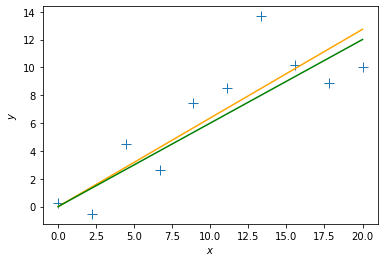

In [ ]:
#@title Soluzione 4C
#plot
import matplotlib.pyplot as plt

x_test = np.linspace(0,20,100)

y_pred = x_test*theta_ml[0]
y_true = x_test*theta_true


plt.figure()
plt.plot(x, y, '+', markersize=10)
plt.plot(x_test, y_pred, color='orange')
plt.plot(x_test, y_true, color='green')
plt.xlabel("$x$")
plt.ylabel("$y$");



In [ ]:
#@title Soluzione 4D
# calcolo RMSE

Ntot = y_true.shape[0]

import time
start = time.time()
mse = np.sum(np.square(y_true-y_pred))/Ntot
rmse = np.sqrt(mse)
stop = time.time()
print('RMSE: ', rmse, ' elapsed time: ', stop-start)

# NB poteva essere calcolato in modo meno efficiente con un loop in puro python

import math
start = time.time()
mse = 0.0
for i in range(Ntot):
  mse += (y_true[i]-y_pred[i])**2

mse /= Ntot
rmse = math.sqrt(mse)
stop = time.time()
print('RMSE: ', rmse, ' elapsed time: ', stop-start)



RMSE:  0.4247006026445915  elapsed time:  0.0002148151397705078
RMSE:  0.4247006026445915  elapsed time:  0.0003578662872314453


**Per casa: estensione del problema con variabili *augmented***

se si volesse tenere conto di un eventuale intercetta: $y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma)$, il modo più semplice di procedere utilizzando lo stesso codice e formule usate nel caso senza intercetta, è quello di definire una nuova variabile *aumentata*: $z = [1, x]\in R^{D+1}$, per cui: $y = \boldsymbol z^T \boldsymbol\theta + \epsilon\,$, in cui $\boldsymbol\theta = [\theta_0, \boldsymbol\theta_1]$.

Provare a modificare il codice scritto nel esercizio 4 in accordo a questa idea.

**Esercizio 5:**

scrivere in python una funzione 2D che rappresenti la funzione matematica: $f(x,y) = x^2-y^2-xy$

*   graficarla con matplotlib
*   graficare le curve di livello (isocurve della funzione)


In [ ]:
#codice

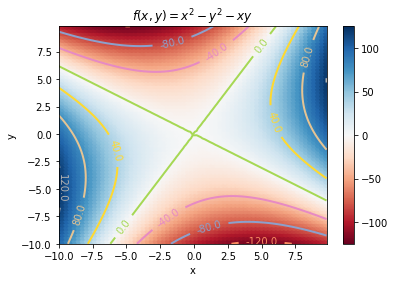

In [ ]:
#@title Soluzione 5
import matplotlib.pyplot as plt

def fun_2d(x,y):
  return x**2-y**2+x*y

xx = np.arange(-10,10,0.3)
yy = np.arange(-10,10,0.3)
X,Y = np.meshgrid(xx,yy)

Z = fun_2d(X,Y)
plt.scatter(X,Y, c=Z, cmap='RdBu')
plt.colorbar() # adding the colobar on the right
cset = plt.contour(X,Y,Z,linewidths=2,cmap='Set2')
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.title('$f(x,y)=x^2-y^2-xy$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
